## 01. Import Libraries

In [1]:
#import libraries 
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
import plotly.express as px
from fractions import Fraction # Library to calculate fractions
import matplotlib
import folium
import json
import plotly
import plotly.express as px
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 2. Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming). 

In [2]:
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.preprocessing import StandardScaler
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
import quandl
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')


In [3]:
# Configure API key
quandl.ApiConfig.api_key = 'WtQ2yBDKu4QFYP9Y2C1z'

## Import Path & Data Set 

In [4]:
# Project folder shortcut path 
path = r'C:\Users\Gregor\ownCloud\CareerFoundry\6.1\WorldUniversityRankings'

In [5]:
path

'C:\\Users\\Gregor\\ownCloud\\CareerFoundry\\6.1\\WorldUniversityRankings'

In [6]:
# import World University Rankings cleaned data set
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'timesData_cleaned.csv'), index_col = 0)

In [6]:
df

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25.0,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27.0,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33.0,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22.0,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,7929.0,8.4,27.0,45 : 55,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,21958.0,15.3,3.0,48 : 52,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,31268.0,28.7,2.0,36 : 64,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,4122.0,3.7,3.0,NaN,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,10117.0,12.1,8.0,28 : 72,2016


In [7]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [8]:
#change the datatype of the female_male_ratio column to float
df['female_male_ratio'] = [str(i).replace(" ", "") for i in df['female_male_ratio']]
df['female_male_ratio'] = [(str(i).replace("nan", "0")) for i in df['female_male_ratio']]
df['female_male_ratio'] = [(str(i).replace("-", "0")) for i in df['female_male_ratio']]
df['female_male_ratio'] = [(str(i).replace(":", "/")) for i in df['female_male_ratio']]
df['female_male_ratio'] = [Fraction(str(i).replace("100/0", "100")) for i in df['female_male_ratio']]
df['female_male_ratio'] = [float(Fraction(str(i).replace("", ""))) for i in df['female_male_ratio']]
df['female_male_ratio']

0       0.000000
1       0.492537
2       0.587302
3       0.724138
4       0.818182
          ...   
2598    0.923077
2599    0.562500
2600    0.000000
2601    0.388889
2602    0.754386
Name: female_male_ratio, Length: 2603, dtype: float64

In [9]:
# Create subset including only data from 2016
#df_2016 = df.loc[df['year'] == 2016]
#pd.set_option('display.max_rows', 200)
#df_2016.shape

(800, 14)

In [35]:
# Create subset including only data from top 200 Universities
df_top200 = df[df['world_rank'].str.len()<2]
df_top200.shape

(55, 14)

In [36]:
# Delete any '=' in the data set
df_top200['world_rank'] = [(str(i).replace("=", "")) for i in df_top200['world_rank']]

# Replace any '-' in the data set with '0'
df_top200['world_rank'] = [float(str(i).replace("-", "0")) for i in df_top200['world_rank']]
df_top200['teaching'] = [float(str(i).replace("-", "0")) for i in df_top200['teaching']]
df_top200['international'] = [float(str(i).replace("-", "0")) for i in df_top200['international']]
df_top200['research'] = [float(str(i).replace("-", "0")) for i in df_top200['research']]
df_top200['citations'] = [float(str(i).replace("-", "0")) for i in df_top200['citations']]
df_top200['income'] = [float(str(i).replace("-", "0")) for i in df_top200['income']]
df_top200['total_score'] = [float(str(i).replace("-", "0")) for i in df_top200['total_score']]
df_top200['num_students'] = [float(str(i).replace("-", "0")) for i in df_top200['num_students']]
df_top200['student_staff_ratio'] = [float(str(i).replace("-", "0")) for i in df_top200['student_staff_ratio']]
df_top200['international_students'] = [float(str(i).replace("-", "0")) for i in df_top200['international_students']]
df_top200['female_male_ratio'] = [float(str(i).replace("-", "0")) for i in df_top200['female_male_ratio']]

# Replace any 'nan' in the data set with '0'
df_top200['world_rank'] = [float(str(i).replace("nan", "0")) for i in df_top200['world_rank']]
df_top200['teaching'] = [float(str(i).replace("nan", "0")) for i in df_top200['teaching']]
df_top200['international'] = [float(str(i).replace("nan", "0")) for i in df_top200['international']]
df_top200['research'] = [float(str(i).replace("nan", "0")) for i in df_top200['research']]
df_top200['citations'] = [float(str(i).replace("nan", "0")) for i in df_top200['citations']]
df_top200['income'] = [float(str(i).replace("nan", "0")) for i in df_top200['income']]
df_top200['total_score'] = [float(str(i).replace("nan", "0")) for i in df_top200['total_score']]
df_top200['num_students'] = [float(str(i).replace("nan", "0")) for i in df_top200['num_students']]
df_top200['student_staff_ratio'] = [float(str(i).replace("nan", "0")) for i in df_top200['student_staff_ratio']]
df_top200['international_students'] = [float(str(i).replace("nan", "0")) for i in df_top200['international_students']]
df_top200['female_male_ratio'] = [float(str(i).replace("nan", "0")) for i in df_top200['female_male_ratio']]

In [37]:
# Set the "year" column as the index

df_top200 = df_top200.set_index('year')
df_top200

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio
year,,,,,,,,,,,,,
2011,1.0,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25.0,0.000000
2011,2.0,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27.0,0.492537
2011,3.0,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33.0,0.587302
2011,4.0,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22.0,0.724138
2011,5.0,Princeton University,United States of America,90.9,70.3,95.4,99.9,0.0,94.2,7929.0,8.4,27.0,0.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,5.0,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,33.0,0.587302
2016,6.0,Harvard University,United States of America,83.6,77.2,99.0,99.8,45.2,91.6,20152.0,8.9,25.0,0.000000
2016,7.0,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,90.1,7929.0,8.4,27.0,0.818182


## 3. Make a subset of your data set if necessary.

In [38]:
# Create subset including only data from Harvard
df_Harvard = df_top200.loc[df_top200['university_name'] == 'Harvard University']
#pd.set_option('display.max_rows', 200)
df_Harvard

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio
year,,,,,,,,,,,,,
2011,1.0,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25.0,0.0
2012,2.0,Harvard University,United States of America,95.8,67.5,97.4,99.8,35.9,93.9,20152.0,8.9,25.0,0.0
2013,4.0,Harvard University,United States of America,94.9,63.7,98.6,99.2,39.9,93.6,20152.0,8.9,25.0,0.0
2014,2.0,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,20152.0,8.9,25.0,0.0
2015,2.0,Harvard University,United States of America,92.9,67.6,98.6,98.9,44.0,93.3,20152.0,8.9,25.0,0.0
2016,6.0,Harvard University,United States of America,83.6,77.2,99.0,99.8,45.2,91.6,20152.0,8.9,25.0,0.0


In [45]:
# Subsetting only world_rank and year from Harvard
data_sub = df_Harvard[['total_score']]
data_sub

,total_score
year,
2011,96.1
2012,93.9
2013,93.6
2014,93.9
2015,93.3
2016,91.6


## 4. Create a line chart of your data.

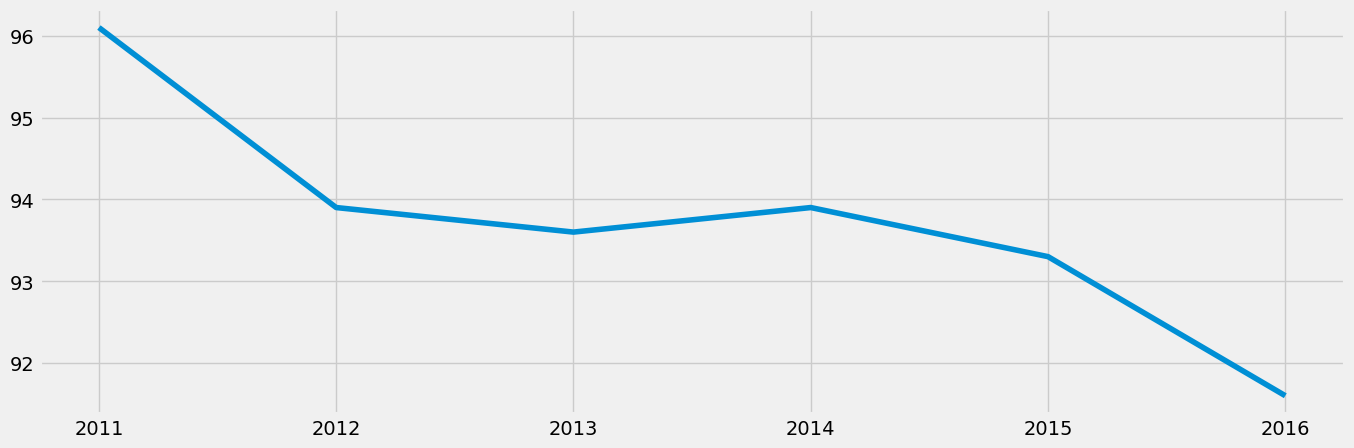

In [46]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

## 5. Decompose the data’s components. 

In [50]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive', period=1)

In [51]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

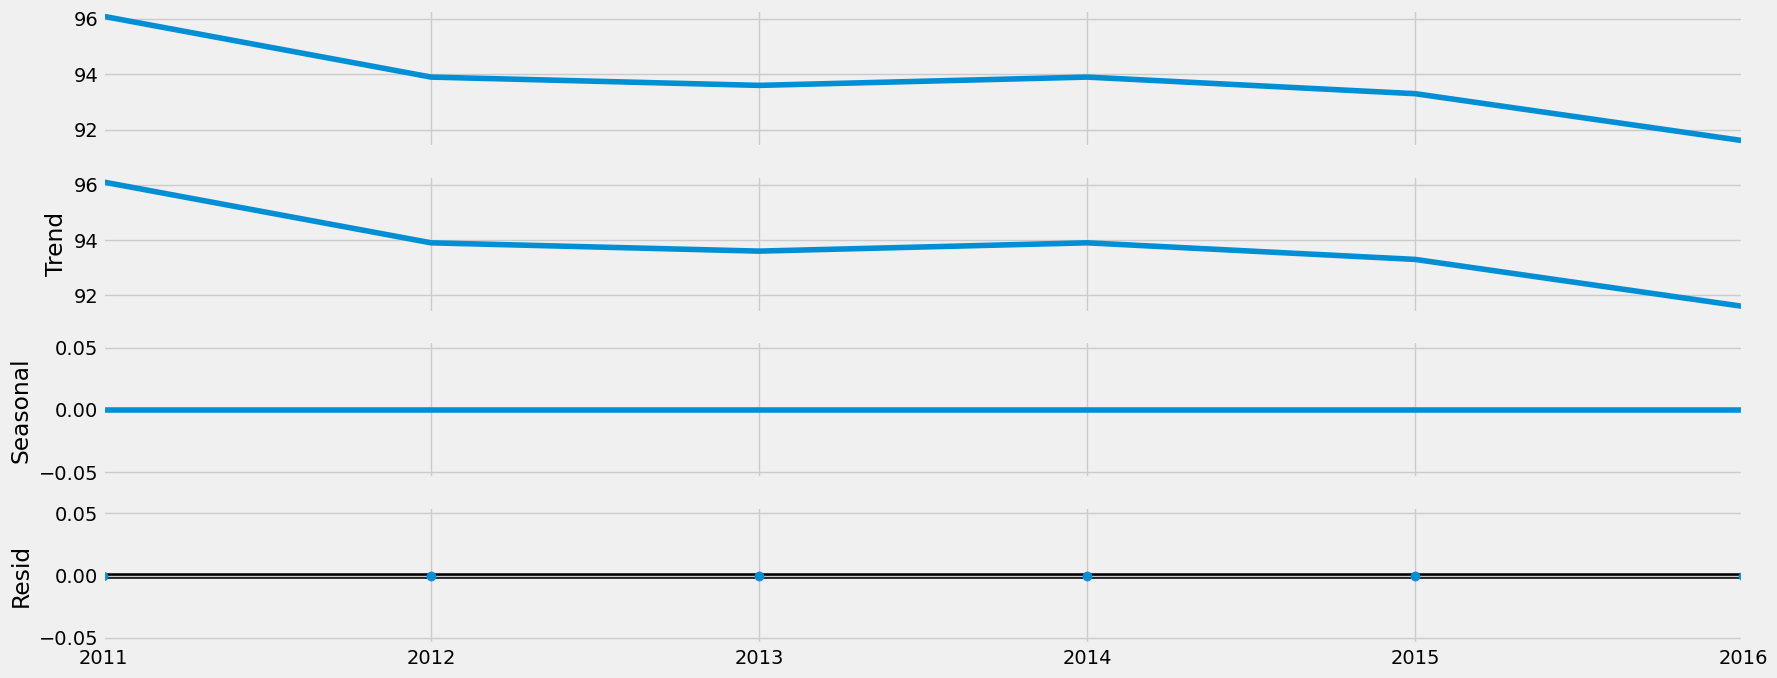

In [52]:
# Plot the separate components

decomposition.plot()
plt.show()

Since there are only six data points from the years 2011, 2012, 2013, 2014, 2015, and 2016, there is no Seasonal or Residual part of the time series decomposition.

## 6. Conduct a Dickey-Fuller test to check for stationarity.



In [54]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['total_score'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.296951
p-value                        0.630566
Number of Lags Used            0.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


Since the cricitcal value of 5% is lower than the test statistic, the data is not stationary. According to "The null hypothesis in this case would be the presence of a unit root (you want to disprove that there’s a unit root, which would mean that your data is stationary). Correspondingly, the alternative hypothesis is that there’s no unit root. If you can’t rule out the null hypothesis, your data is non-stationary." this means that there is a unit root and the data is non-stationary.

## 7. If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.


In [55]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)


In [56]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [57]:
data_diff.head()

,total_score
year,
2012,-2.2
2013,-0.3
2014,0.3
2015,-0.6
2016,-1.7


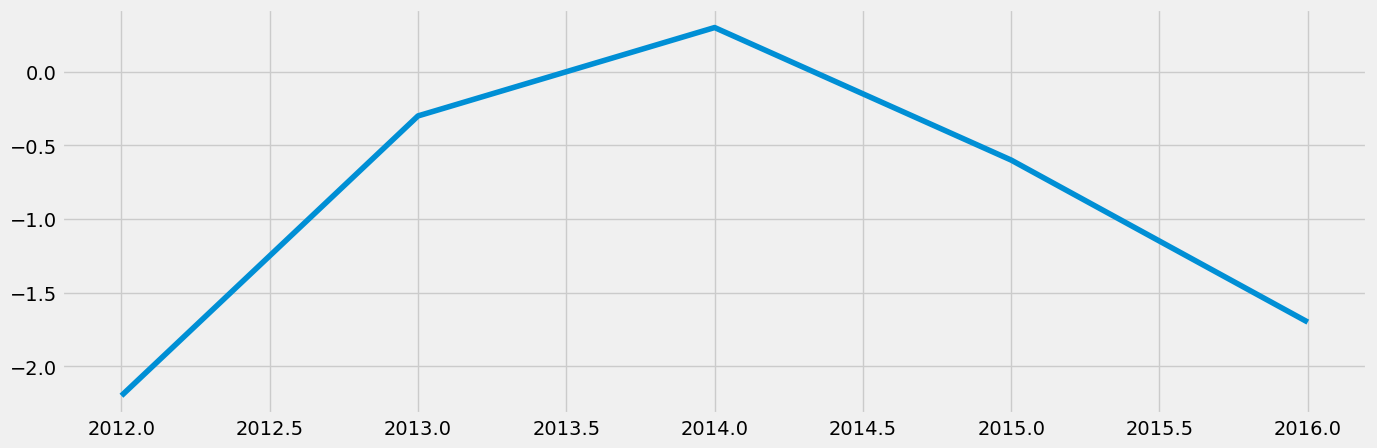

In [58]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [59]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.912208
p-value                        0.326340
Number of Lags Used            0.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


The test statistic still is not below the critical value and thus the data still is not stationary.

## 8. If your data still isn’t stationary, perform another round of differencing and repeat step 6.


In [60]:
data_diff2 = data_diff - data_diff.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)


In [61]:
data_diff2.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [62]:
data_diff2

,total_score
year,
2013,1.9
2014,0.6
2015,-0.9
2016,-1.1


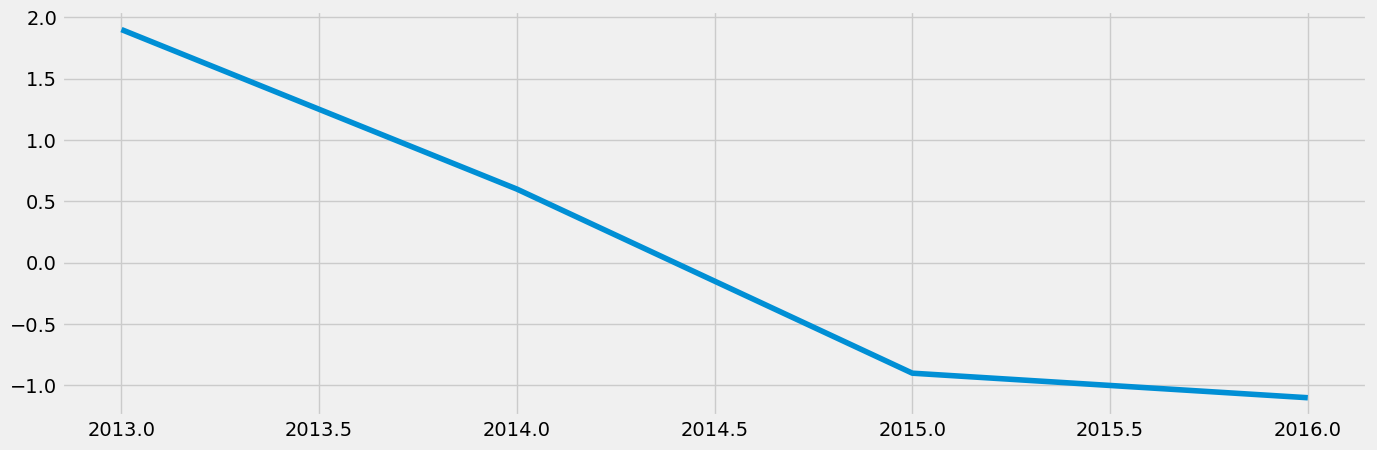

In [63]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [64]:
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.383900
p-value                         0.589970
Number of Lags Used             0.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64


## 9. Check your data’s autocorrelations.

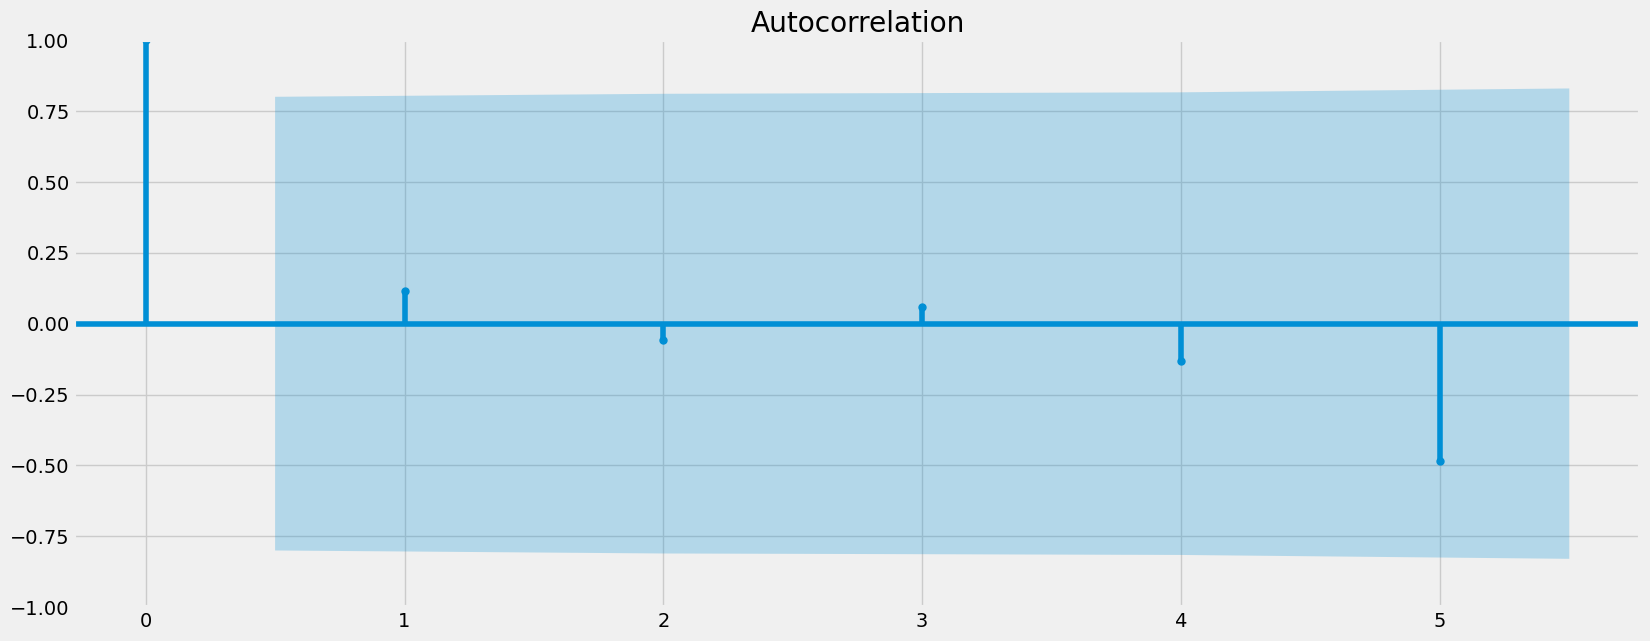

In [66]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

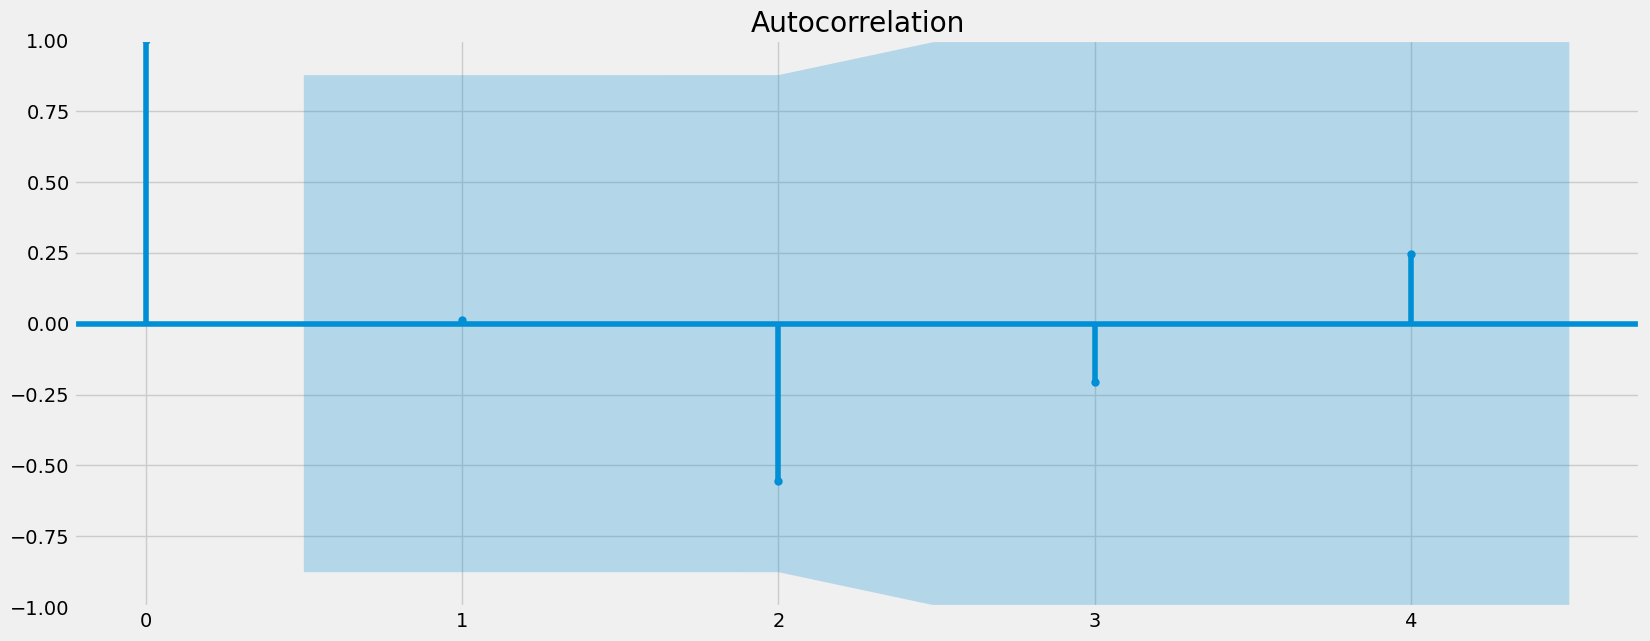

In [67]:
plot_acf(data_diff)
plt.show()

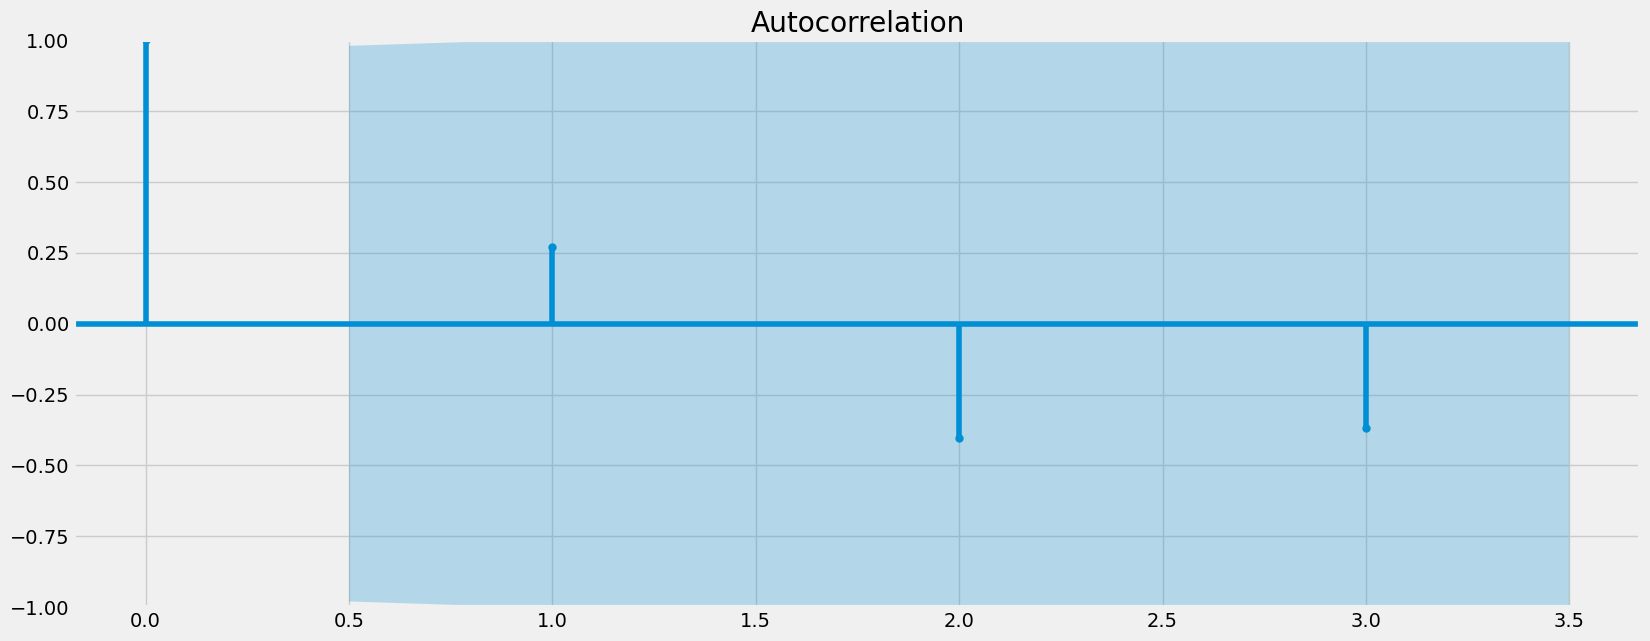

In [68]:
plot_acf(data_diff2)
plt.show()